# K-Means Clustering

Ultimate goal of this exercise is to implement K-means clustering and use it to compress an image.  

Firstly, we'll start with a simple 2D data set to implement initializing centroids, finding closest centroids and computing centroid means. Then we'll apply it to image compression prob


# 1. K-means clustering on a 2-D dataset

To start out we're going to implement and apply K-means to a simple 2-dimensional data set to gain some intuition about how it works.  K-means is an iterative, unsupervised clustering algorithm that groups similar instances together into clusters.  

The algorithm will:
* randomly initialize the initial centroids for each cluster
* repeatedly assign datapoints to the nearest cluster 
* re-compute the centroids of each cluster

In [282]:
import numpy as np
from numpy import random
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Cluster assignment algorithm

In [227]:
initial_centroids = np.array([X[random.randint(0,50)], X[random.randint(50,100)], X[random.randint(100,150)]])

# Assign every training example x^(i) to its closest centroid, given the current centroid positions
def find_closest_centroids(X, centroids):
    '''returns the array of assigned clusters to each example '''

#   Make a copy of X
    clusters = np.array(X)
   
    for i, datapoint in enumerate(X):
      distances = []
      
#     Distances contain the distance of a datapoint from each centroid. Each index of
#     distances represents the corresponding centroids class.
      for j, centroid in enumerate(centroids):
        distances.insert(j, np.linalg.norm(datapoint - centroids[j]))
        
#     The index of the minimum distance in the distances list corresponds the class to which that datapoint belongs
      belongs_to_class = distances.index(min(distances))
  
#     Insert calculated class into the last column of the datapoint
      clusters[i][-1] = belongs_to_class

    return clusters


In [283]:
data = pd.read_csv('./iris.data', header=None)
data.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
X = np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y = np.asarray(data['Class'].dropna()) 

# Add extra column to X
X = np.c_[X, np.zeros(X.shape[0])]  

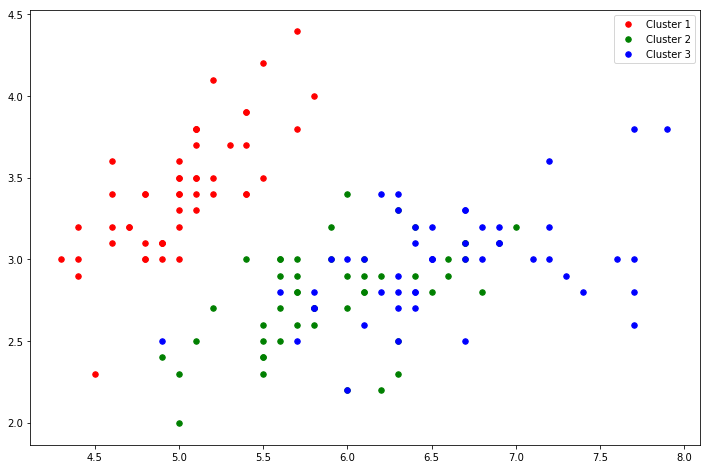

In [284]:
cluster1 = X[0:50,:]
cluster2 = X[50:100,:]
cluster3 = X[100:150,:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()

Now we will shuffle our data so that the data point are not in order.

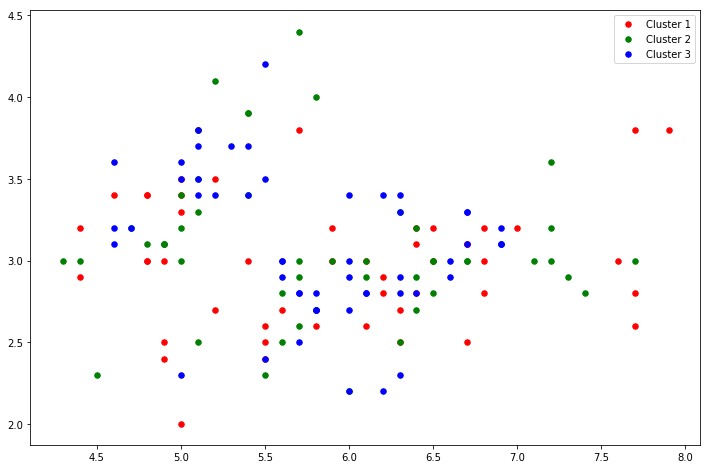

In [285]:
np.random.shuffle(X)
cluster1 = X[0:50,:]
cluster2 = X[50:100,:]
cluster3 = X[100:150,:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()


Now, test the function to make sure it's working as expected.  We'll use the test case provided in the exercise.

In [261]:
initial_centroids = np.array([X[random.randint(0,50)], X[random.randint(50,100)], X[random.randint(100,150)]])
print (initial_centroids)

[[5.7 3.8 1.7 0.3 0. ]
 [5.9 3.2 4.8 1.8 0. ]
 [6.7 3.1 4.7 1.5 0. ]]


## Computing centoroid means

Next we need a function to compute the centroid of a cluster.  The centroid is simply the mean of all of the examples currently assigned to the cluster.

In [288]:
# datapoints_with_class is X with the last column "Class" computed
datapoints_with_class = find_closest_centroids(X, initial_centroids)

# Update Centroids
def compute_centroids(X, idx, k):
    '''Returns newly computed centroids'''

    new_centroids = []
    
    for cent in range(0, k):
      
#     Extract all the rows corresponding to the centroid "cent" by checking the last column "Class"
      datapoints_of_centroid = X[X[:, -1] == cent]
      
#     Taking mean of all columns of the extracted datapoints
      mean = np.mean(datapoints_of_centroid, axis=0)
  
      new_centroids.append(mean)
  
    new_centroids = np.array(new_centroids)
    
#   Make class column zero so as not to effect distance calculation in find_closest_centroids
    new_centroids[:, -1] = 0
    
    return new_centroids

print (compute_centroids(datapoints_with_class, idx, 3))

[[5.00784314 3.4        1.49411765 0.26078431 0.        ]
 [5.84909091 2.79272727 4.63272727 1.60545455 0.        ]
 [6.80454545 2.97954545 5.29090909 1.77727273 0.        ]]


This output also matches the expected values from the exercise.

## Putting it all together (full algorithm: cluster assignment and re-computing centroids)


Let's run the full algorithm. We will alternate between assigning examples to the nearest cluster and re-computing the cluster centroids for some number of iterations.

In [289]:
def run_k_means(X, initial_centroids, max_iters):
    '''returns final indexes and centroids after running kmeans for max_iters'''
    
    X_with_classes = find_closest_centroids(X, initial_centroids)
    new_centroids = compute_centroids(X_with_classes, initial_centroids, 3)
    
    for i in range(0, max_iters):
      X_with_classes = find_closest_centroids(X, new_centroids)
      new_centroids = compute_centroids(X_with_classes, new_centroids, 3)

    return X_with_classes, new_centroids

In [290]:
idx, centroids = run_k_means(X, initial_centroids, 1000)

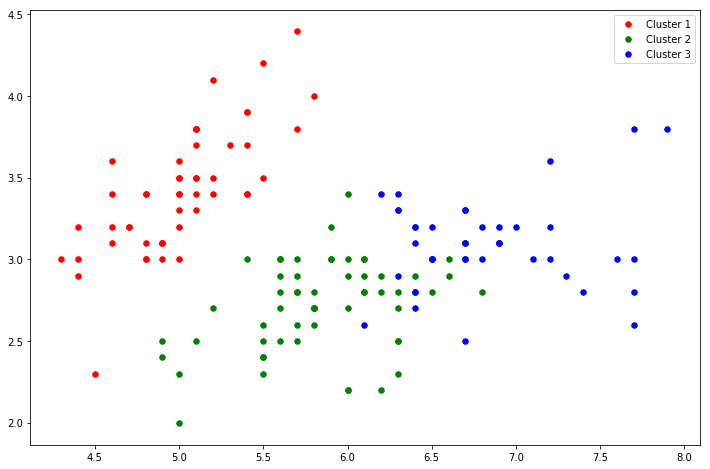

In [291]:
cluster1 = idx[idx[:, -1] == 0]
cluster2 = idx[idx[:, -1] == 1]
cluster3 = idx[idx[:, -1] == 2]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()